In [1]:
import pandas as pd

266


<AxesSubplot:title={'center':'Perect NaN per Year in GDP1.csv'}>

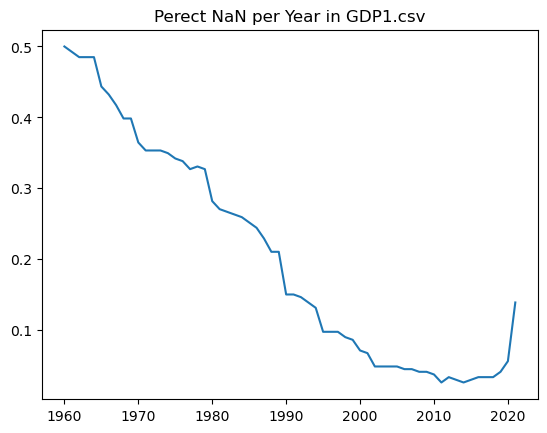

In [30]:
gdp_df = pd.read_csv('datasets/GDP1.csv')
## Get the percent of null values by column and out to csv. 
#print(gdp_df[[col for col in gdp_df.columns]].isna().sum())
print(len(gdp_df.index))
na_gdf = gdp_df[[col for col in gdp_df.columns]].isna().sum() / len(gdp_df.index)
na_gdf = na_gdf[na_gdf != 0]
na_gdf.plot(title="Perect NaN per Year in GDP1.csv")

In [72]:
copy = gdp_df.copy()
copy["na_row"] = gdp_df.isnull().sum(axis=1)
copy.columns
copy[["Country Name", "na_row"]].sort_values(by=["na_row"], ascending=False).to_csv("test2")

In [34]:
df2 = pd.melt(gdp_df, id_vars='Country Name', value_vars=list(gdp_df.columns[4:]), var_name='Year', value_name='GDP')
df2 = df2.rename(columns={'Country Name': 'Country'})
df2['Year'] = df2['Year'].astype('int64')
df2.head()

,Country,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,2.129059e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.040414e+10
4,Angola,1960,NaN


In [63]:
na_df2 = df2[[col for col in df2.columns]].isna().sum() / df2.count()
na_country_df = df2[df2.GDP.isna()].groupby("Country").count().rename(columns={"Year": "count_years_na"})

na_country_df["percent_nan"] = na_country_df["count_years_na"] / 62
test = na_country_df["percent_nan"].sort_values(ascending=False)
test

Country
Gibraltar                    1.000000
Korea, Dem. People's Rep.    1.000000
Not classified               1.000000
British Virgin Islands       1.000000
St. Martin (French part)     0.967742
                               ...   
Argentina                    0.032258
Mauritania                   0.016129
Myanmar                      0.016129
New Zealand                  0.016129
Puerto Rico                  0.016129
Name: percent_nan, Length: 144, dtype: float64

In [41]:
year_dfs = []
year_sets = {}
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    year_df = pd.read_csv("datasets/"+str(year)+".csv", encoding="latin-1")
    year_dfs.append(year_df)
    year_sets[year] = set(year_df.columns)

In [43]:
for i, (year, set_i) in enumerate(year_sets.items()):
    for j, (year2, set_i2) in enumerate(year_sets.items()):
        print(year, year2)
        print(set_i.difference(set_i2))
        print()

2015 2015
set()

2015 2016
{'Standard Error'}

2015 2017
{'Standard Error', 'Dystopia Residual', 'Region'}

2015 2018
{'Region', 'Standard Error', 'Family', 'Dystopia Residual', 'Health (Life Expectancy)', 'Trust (Government Corruption)'}

2015 2019
{'Economy (GDP per Capita)', 'Region', 'Standard Error', 'Freedom', 'Family', 'Dystopia Residual', 'Health (Life Expectancy)', 'Trust (Government Corruption)'}

2015 2020
{'Economy (GDP per Capita)', 'Region', 'Standard Error', 'Freedom', 'Family', 'Dystopia Residual', 'Health (Life Expectancy)', 'Trust (Government Corruption)'}

2015 2021
{'Economy (GDP per Capita)', 'Region', 'Standard Error', 'Freedom', 'Family', 'Dystopia Residual', 'Health (Life Expectancy)', 'Trust (Government Corruption)'}

2015 2022
{'Economy (GDP per Capita)', 'Region', 'Standard Error', 'Freedom', 'Family', 'Dystopia Residual', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity'}

2016 2015
{'Lower Confidence Interval', 'Upper Confidence Inte

In [17]:
gdp_df = pd.read_csv('datasets/GDP1.csv')
na_cols_gdp_df = [col for col in gdp_df.columns if gdp_df[col].isna().sum() > 0]
na_cols_gdp_df

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Happiness Rank,Happiness Score,Freedom_Rating,Life Expectancy,GDP
0,0,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,NaN,NaN,NaN,62.054,1.990732e+10
1,1,Afghanistan,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847,NaN,NaN,27.0,62.525,2.014640e+10
2,2,Afghanistan,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048,NaN,NaN,26.0,62.966,2.049713e+10
3,3,Afghanistan,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557,153.0,3.575,24.0,63.377,1.913421e+10
4,4,Afghanistan,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990,154.0,3.360,24.0,63.763,1.811656e+10


In [7]:
df[[col for col in df.columns]].isna().sum() / df.count()

Unnamed: 0                           0.000000
Country                              0.000000
Year                                 0.000000
Life Ladder                          0.000000
Log GDP per capita                   0.016236
Social support                       0.003644
Healthy life expectancy at birth     0.032234
Freedom to make life choices         0.013245
Generosity                           0.029918
Perceptions of corruption            0.063320
Positive affect                      0.008791
Negative affect                      0.006579
Confidence in national government    0.109589
Happiness Rank                       0.493492
Happiness Score                      0.493492
Freedom_Rating                       0.160067
Life Expectancy                      0.129614
GDP                                  0.129614
dtype: float64